To run this notebook, refer to the README.md file in the root directory of this repository for installation instructions and other information.

# Problem statement
The function  employs a mathematical optimization model that integrates simulated transport data to define service regions for bike-sharing systems. The methodology follows these key steps:
1.	Input data pre-processing (for public transport network structure and user demand)
2.	Network building and assumptions, as explained in the model paper 
3.	Decision criteria model, includes different parameters like budget, investment costs, and operational efficiency, multimodal accessibility (to enhance the connectivity within the network), the framework penalizes suboptimal routes
4.	The output result is an optimized configuration of bike-sharing stations within the network. The bike inventory and capacity per station over different time periods is also provided

## 1. Input data and 2. Network building
The demonstrator creates the simulation data for the model. The network is built with the following configuration : 
- Grid 5 width, 5 height
- max of 2 shortest paths
- 100 user demand 

The `preprocess` function creates the data. 

```py
grid_generator, public_transport, bike_stations, demand_generator = preprocess(
        AREA_LENGTH, AREA_WIDTH, CELL_SIZE
    )
```

To visualize the simulated data, use the `Visualize` class

```py

visualizer = Visualize(
        grid_generator=grid_generator,
        pt=public_transport,
        shortest_path_solver=None,
        demand_generator=demand_generator,
    )
visualizer.plot_grid()
visualizer.plot_grid_with_nodes()
visualizer.plot_demand_flow()

```

Finally, create the network and calculate the shortest paths for every trip in the network. 
The calculated shortest paths are saved in a local file the first time, for cache purposes. 
```py

network = NetworkConstructor(
        grid_generator.grid, grid_generator, public_transport, bike_stations
    )

shortest_path_solver = ShortestPathSolver(network.graph, k=NUM_SHORTEST_PATHS)

```

## 3. Define the decision criteria
TODO: Refactor to define tunable decision criteria for the optimization model. This data will be passed to the `BikeSharingModel` class. 
```py
#TODO: create a decision criteria for the optimization model, for example
```

## 4. Run the model 
To run the model, create an instance of the `BikeSharingModel` class, with the network, the shortest path solver, and the demand generator as parameters.

```py
result_model = BikeSharingModel(network, shortest_path_solver, demand_generator)
```

## 5. Visualize the results
The results of the model are saved in a local file. The `Visualize` class can be used to visualize the results. 

```py
    visualizer.model = result_model
    visualizer.plot_model_output()
```

# Future work 
- The code in this demonstrator will be refactored, only with necessary functions for the purpose of this demo.
- The model decision variables will be refactored to use the decision criteria as dynamic parameters
- The data visualization will be improved, with more dynamic plots and using hexagonal presentation for the grid. We will use LeafLet in an HTML/JS page, to visualize the data in a more interactive way.
- The model will be executed with Geneva Living Lab data, a new demo script will be created for this purpose.




Preprocessing data started at 2025-04-03 12:03:04.954055
Network generation started
Grid center walks to userOD processed: 0 arcs added.

Grid center walks to bikeStation processed: 25 arcs added.

Grid center walks to publicTransportStop processed: 4 arcs added.

PT stop walks to bike stations processed: 4 arcs added.

Biking processed: 188 arcs added.

Node: 
  - userOD: 25
  - bikeStation: 25
  - publicTransportStop: 4

 Arc:
  - Walk: 66
  - Bike: 376
  - PT_1: 6
Visualize network data


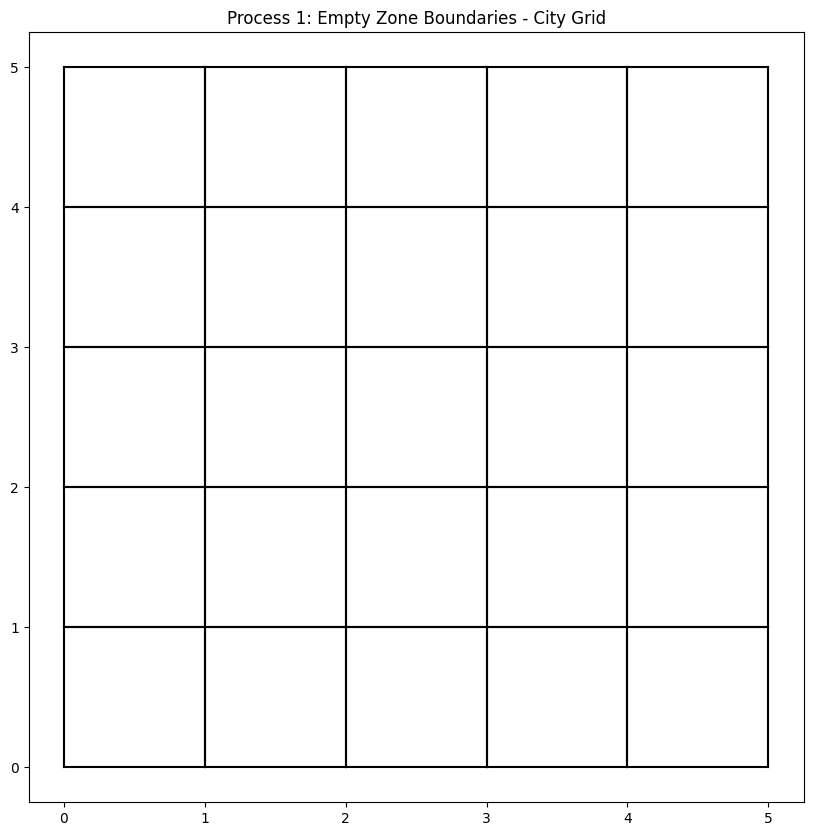

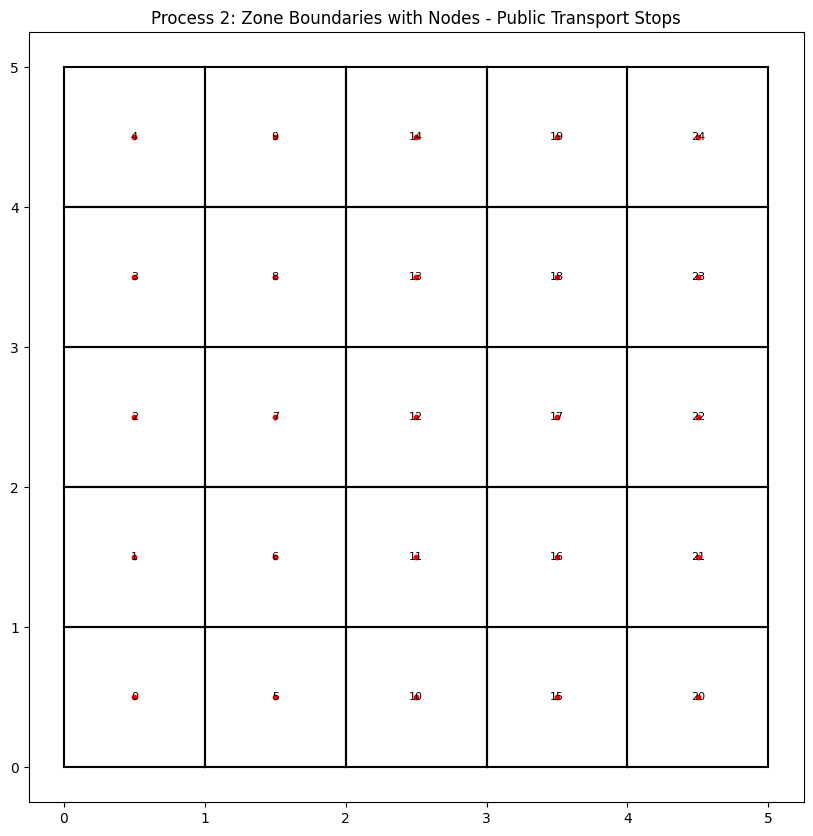

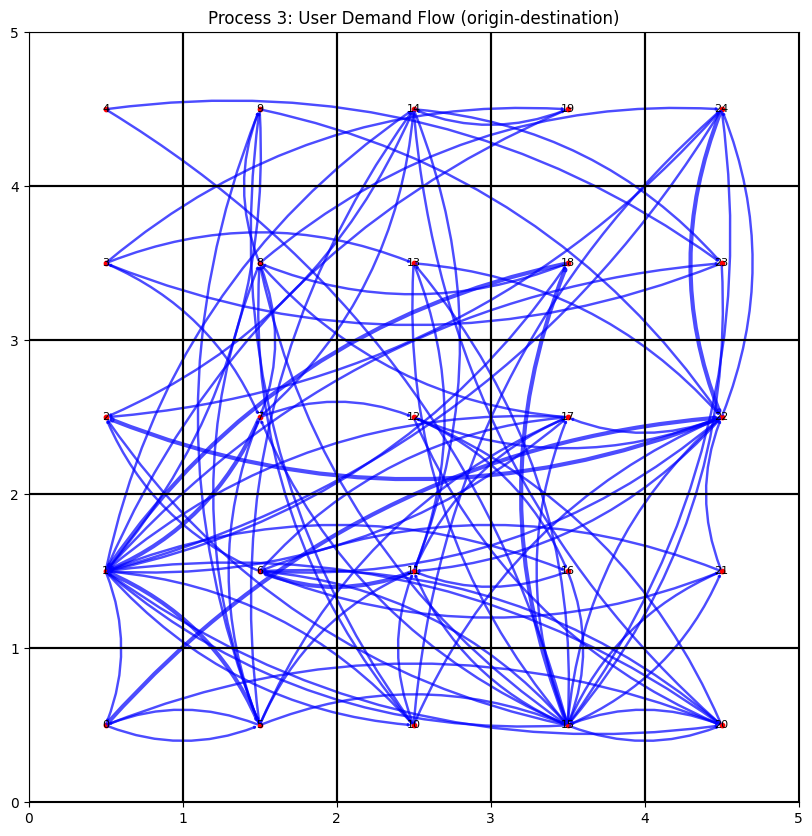

Shortest path solver started


Processing user OD nodes: 100%|██████████| 25/25 [00:20<00:00,  1.21it/s]

Quantity of multi-modal trips:
  - {'Walk', 'Bike'}: 351
  - {'Walk', 'PT_1', 'Bike'}: 464
  - {'Walk', 'PT_1'}: 12
------------------
Proportion of disconnected OD pairs: 0.0567
------------------
✅ The shortest path calculation is complete and has been stored in the cache file!
Bike sharing stations optimization started
Restricted license - for non-production use only - expires 2026-11-23
=== Sets Initialization Completed ===
Total OD pairs (K): 827
Total Bike Stations (B): 25
=== Parameters Initialization Completed ===
Start setting variables
=== Variables Initialization Completed ===
=== Objectives Initialization Completed ===
=== Constraints Initialization Completed ===
Final total constraints count: 0
Set parameter TimeLimit to value 1800
Set parameter Method to value 3


---------------------------
Statistics for model 'NetworkDesign':
  Problem type                : MIP
  Linear constraint matrix    : 1213 rows, 1244 columns, 3130 nonzeros
  Variable types              : 0 continuous, 1244 integer (221 binary)
  Matrix range                : [1e+00, 1e+06]
  Objective range             : [8e-01, 9e-01]
  Bounds range                : [1e+00, 1e+01]
  RHS range                   : [1e+00, 2e+04]
---------------------------
✅ Gurobi resulst at gurobi_results_5*5_20250403_120327.json
🚲 站点 Node(BS-0, coordinate=(0.5, 0.5), is_origin=False, : y = 1.0, v(initial inventory) = 6.0, z(capacity) = 6.0
🚲 站点 Node(BS-1, coordinate=(0.5, 1.5), is_origin=False, : y = 1.0, v(initial inventory) = 10.0, z(capacity) = 10.0
🚲 站点 Node(BS-2, coordinate=(0.5, 2.5), is_origin=False, : y = 1.0, v(initial inventory) = -0.0, z(capacity) = -0.0
🚲 站点 Node(BS-3, coordinate=(0.5, 3.5), is_origin=False, : y = 1.0, v(initial inventory) = 2.0, z(capacity) = 2.0
🚲 站点 Node(BS-4, coordin

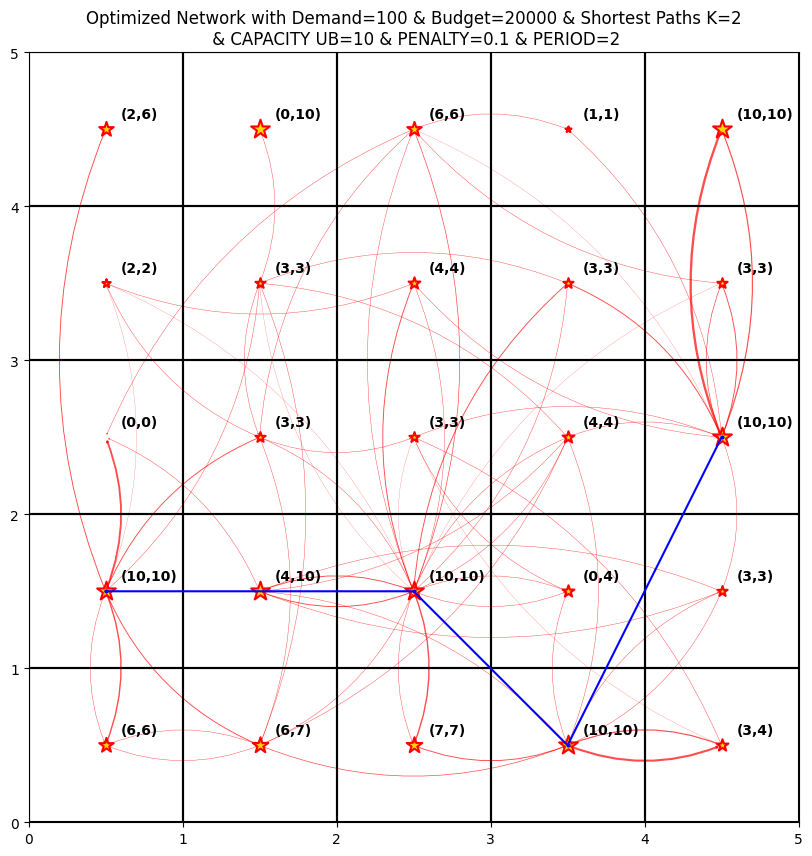

Simulation completed in 0:00:23.498287


In [1]:
from input_handler.preprocess import preprocess
from output_handler.visualize import Visualize
from model.bike_sharing_optimization import BikeSharingModel
from network.network_constructor import NetworkConstructor
from shortest_path.shortest_path_solver import ShortestPathSolver
from datetime import datetime
from util.util import AREA_LENGTH, AREA_WIDTH, CELL_SIZE, NUM_SHORTEST_PATHS


def run_simulation():
    start_time = datetime.now()

    print(f"Preprocessing data started at {start_time}")
    grid_generator, public_transport, bike_stations, demand_generator = preprocess(
        AREA_LENGTH, AREA_WIDTH, CELL_SIZE
    )

    print(f"Network generation started")
    network = NetworkConstructor(
        grid_generator.grid, grid_generator, public_transport, bike_stations
    )

    print(f"Visualize network data")
    demoPlot = Visualize(
        grid_generator=grid_generator,
        pt=public_transport,
        shortest_path_solver=None,
        demand_generator=demand_generator,
    )
    demoPlot.plot_grid()
    demoPlot.plot_grid_with_nodes()
    demoPlot.plot_demand_flow()

    print(f"Shortest path solver started")
    shortest_path_solver = ShortestPathSolver(network.graph, k=NUM_SHORTEST_PATHS)
    demoPlot.shortest_path_solver = shortest_path_solver
    # plot shortest paths ?

    print(f"Bike sharing stations optimization started")
    demoPlot.model = BikeSharingModel(network, shortest_path_solver, demand_generator)
    
    print(f"Visualize result optimized network data")
    demoPlot.plot_model_output()

    print(f"Simulation completed in {datetime.now() - start_time}")


run_simulation()